,class,Freq,int.class
3,Berserker,8711,Marauder
15,Necromancer,7077,Witch
23,Slayer,5485,Duelist
18,Raider,5150,Ranger
9,Gladiator,4900,Duelist
17,Pathfinder,4239,Ranger
1,Ascendant,3754,Scion
12,Inquisitor,3391,Templar
25,Trickster,3058,Shadow
5,Chieftain,2130,Marauder


,class,Freq,int.class,dead.num,dead.ratio
17,Pathfinder,4239,Ranger,373,0.08799245
18,Raider,5150,Ranger,1216,0.23611650
3,Berserker,8711,Marauder,2621,0.30088394
2,Assassin,679,Shadow,225,0.33136966
23,Slayer,5485,Duelist,1825,0.33272562
8,Elementalist,1326,Witch,442,0.33333333
1,Ascendant,3754,Scion,1380,0.36760788
6,Deadeye,719,Ranger,269,0.37413074
20,Saboteur,1281,Shadow,483,0.37704918
10,Guardian,1177,Templar,448,0.38062872


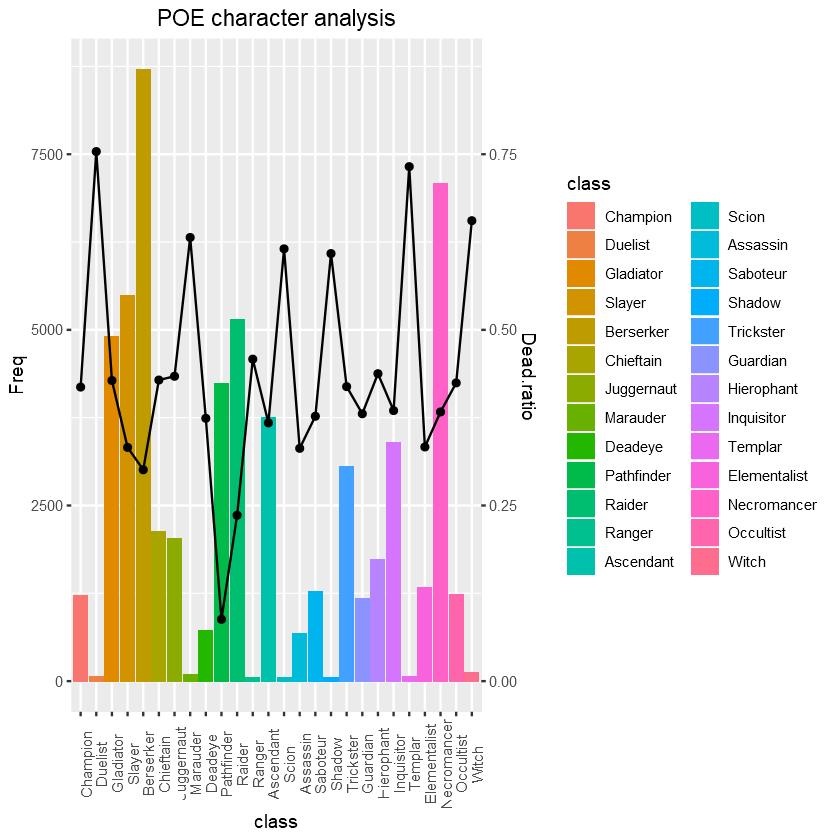

In [1]:
data=read.csv('C:\\Users\\coco40725\\Documents\\GitHub\\2nd-ML100Days\\data\\poe.stat.csv')

##資料column
col.number=ncol(data)
feature=colnames(data) 

## 資料row
row.number=nrow(data)

## 最多人玩的角色 : 

class=as.character(data$class)
class=as.data.frame(table(class))

int.class=c()

for (j in 1:26) {
  class.f=as.character(class$class[j])
  
  if(class.f=='Juggernaut'|class.f=='Berserker'|class.f=='Chieftain'|class.f=='Marauder'){
    int.class[j]='Marauder'
  }
  
  if(class.f=='Necromancer'|class.f=='Occultist'|class.f=='Elementalist'|class.f=='Witch'){
    int.class[j]='Witch'
  }
  
  if(class.f=='Deadeye'|class.f=='Raider'|class.f=='Pathfinder'|class.f=='Ranger'){
    int.class[j]='Ranger'
  }
  
  if(class.f=='Inquisitor'|class.f=='Hierophant'|class.f=='Guardian'|class.f=='Templar'){
    int.class[j]='Templar'
  }
  
  if(class.f=='Assassin'|class.f=='Saboteur'|class.f=='Trickster'|class.f=='Shadow'){
    int.class[j]='Shadow'
  }
  
  if(class.f=='Slayer'|class.f=='Gladiator'|class.f=='Champion'|class.f=='Duelist'){
    int.class[j]='Duelist'
  }
  
  if(class.f=='Ascendant'|class.f=='Scion'){
    int.class[j]='Scion'
  }
}

class=data.frame(class,int.class=int.class)
class=class[order(class$int.class),]
class$class=factor(class$class,levels=class$class)

library(ggplot2)

rank.class=class[order(-class$Freq),]
rank.class
#最多人玩的昇華角色前三名為Berserker (暴徒)、Necromancer (死靈師)、 Slaye (處刑者)

## 各個角色的死亡率-不含初始角色
dead.num=c()
for (i in 1:26) {
  loc=which(data$class==class$class[i])
  dead.num[i]=length(which(data$dead[loc]==T))
}

class.data=data.frame(class,dead.num=dead.num)
dead.ratio=class.data$dead.num/class.data$Freq
class.data=cbind(class.data,dead.ratio=dead.ratio)

rank.dead.ratio=class.data[order(class.data$dead.ratio),]
rank.dead.ratio


##死亡率最低的前3為 Pathfinder (追獵者) 、Raider (俠客)、Berserker (暴徒)
##死亡率最高的前3為 Hierophant(聖宗)、Juggernaut(勇士)、Chieftain(酋長) ，此處只考慮昇華


plot.class.test=ggplot()+
  geom_col(data=class.data,aes(x=class,y=Freq,fill=class))+
  geom_line(data=class.data,aes(x=class,y=dead.ratio*10000, group = 1))+
  geom_point(data=class.data,aes(x=class,y=dead.ratio*10000))+
  theme(axis.text.x = element_text(angle = 90))+
  scale_y_continuous(sec.axis = sec_axis(~./10000,name='Dead.ratio'))+
  ggtitle('POE character analysis')+
  theme(plot.title = element_text(hjust = 0.5))

plot.class.test